# Skin Follicles

## Initialize

In [3]:
import numpy as np
from pandas import *
from scipy.io import loadmat,savemat
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans
from sklearn.mixture import GaussianMixture

In [4]:
fc=['orient/0','orient/45','orient/90','orient/135','orient/180','orient/225','orient/270','orient/315']

In [7]:
def Superpixel_preprocessing(data,MMpbp,clustern=1024):
    
    #读矩阵数据
    temp=[]
    parameters=['FinalM11','FinalM12','FinalM13','FinalM14',
                'FinalM21','FinalM22','FinalM23','FinalM24',
                'FinalM31','FinalM32','FinalM33','FinalM34',
                'FinalM41','FinalM42','FinalM43','FinalM44']
    for para in parameters:
        temp.append( data[para] )
    MM=np.stack(temp,axis=2)
    MM[:,:,0]=1.
    
    #进行超像素计算
    ss=StandardScaler()
    xx=ss.fit_transform(  MM.reshape(MM.shape[0]*MM.shape[1],MM.shape[2]))
    from sklearn.cluster import MiniBatchKMeans
    minikm=MiniBatchKMeans(n_clusters=clustern,batch_size=10*clustern,random_state=2021214521)
    minikm.fit(xx)
        
    #总结以及输出结果
    groups=[]
    for i in range(clustern):
        groups.append(MMpbp[minikm.labels_.reshape(MM.shape[:2])==i].mean(axis=0))
    #groups=array(groups)

    return groups, minikm.labels_.reshape(MM.shape[:2])

In [8]:
for file_path in fc:
    print(file_path)
    data=loadmat(file_path+'/FinalMM.mat')
    MMpbp=loadmat(file_path+'/pbps.mat') ['pbps']
    groups,km_labels=Superpixel_preprocessing(data,MMpbp,clustern=1024)
        
    savemat(file_path+'/groups.mat',{'groups':groups})
    savemat(file_path+'/km_labels.mat',{'km_labels':km_labels})

orient/0


C:\Users\87119\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


orient/45


C:\Users\87119\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


orient/90


C:\Users\87119\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


orient/135


C:\Users\87119\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


orient/180


C:\Users\87119\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


orient/225


C:\Users\87119\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


orient/270


C:\Users\87119\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


orient/315


C:\Users\87119\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


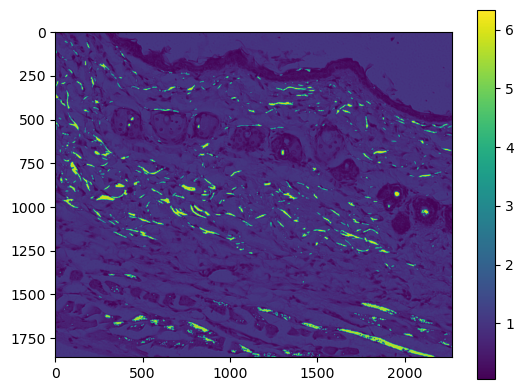

In [762]:
DLsubqL=loadmat(fc[0]+'/DLsubqL.mat')['DLsubqL']
m11=loadmat(fc[0]+'/m11.mat')['CalibratedM11']
standard_mask=DLsubqL<-.2

mask=zeros(shape(DLsubqL))
mask[750:1000,0:1000]=1
roi=standard_mask*mask
plt.imshow(5*standard_mask + m11)
colorbar()
#plt.savefig('standard_backgroud.jpg',dpi=1000,bbox_inches='tight')
savemat('roi_collagen.mat',{'roi':roi})

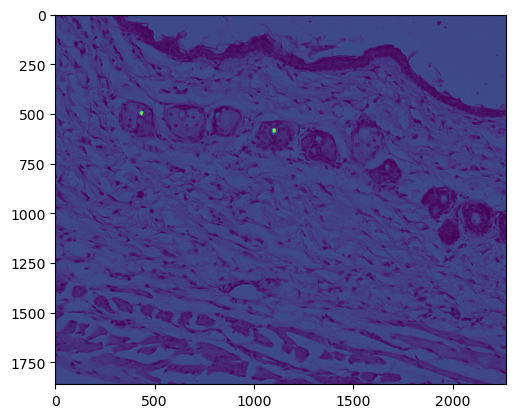

(121,)


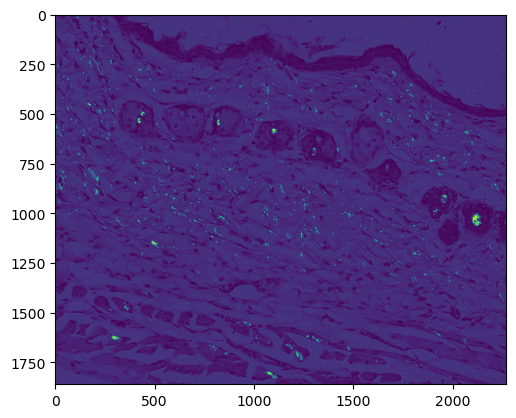

In [956]:
param = ['roi_background.mat','roi_cell_core.mat','roi_collagen.mat','roi_epithelium.mat','roi_muscle.mat','roi_sebaceous_gland.mat','roi_shaft.mat']
km_label=loadmat(fc[0]+'/km_labels.mat')['km_labels']

roi_background=loadmat(param[6])['roi']

interest = m11 + 3*roi_background
plt.imshow(interest)
#plt.savefig('interest.jpg',dpi=1000,bbox_inches='tight')
plt.show()
Mask=km_label*roi_background
a,indices=np.unique(Mask,return_counts=True)
contribute=stack((a,indices),axis=1)
contribute1=contribute[np.lexsort(-contribute.T)]
print(shape(np.unique(contribute1)))
name=['Pixel','Number']
DATA=DataFrame(contribute1,columns=name)
percent10=contribute1[0:int(0.1 * size(np.unique(a))),0]
percent30=contribute1[0:int(0.3 * size(np.unique(a))),0]
percent50=contribute1[0:int(0.5 * size(np.unique(a))),0]
percent70=contribute1[0:int(0.7 * size(np.unique(a))),0]
percent100=contribute1[:,0]
result=zeros(shape(m11))

for i in percent10:
    result[km_label==i]=1
    
result_ground = result

interest_result=5*result + m11
plt.imshow(interest_result)
#plt.savefig('interest_result.jpg',dpi=1000,bbox_inches='tight')
#plt.savefig('10%.jpg',dpi=1000, bbox_inches='tight')
#savemat('result.mat',{'result':result})

In [967]:
standard_mask1=standard_mask.reshape(m11.shape[0]*m11.shape[1],1)
result1=result.reshape(m11.shape[0]*m11.shape[1],1)
DATA=stack((standard_mask1,result1),axis=1)
a,indices = np.unique(DATA,return_counts=True, axis=0)
P=indices[3] / (indices[3] + indices[1])
R=indices[3] / (indices[3] + indices[2])
E=indices[1] / (indices[2] + indices[3])
print(P)
print(R)
print(E)

0.19865211810012837
0.04177281392877027
0.16850842710846423


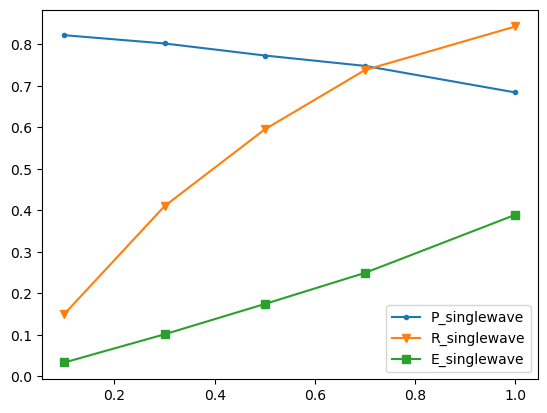

In [593]:
P_1=[0.822,0.802,0.773,0.748,0.684]
R_1=[0.150,0.410,0.595,0.738,0.843]
E_1=[0.033,0.101,0.174,0.249,0.389]
x=[0.1,0.3,0.5,0.7,1]
labels=['P_singlewave','R_singlewave','E_singlewave']
plt.plot(x,P_1,marker='.')
plt.plot(x,R_1,marker='v')
plt.plot(x,E_1,marker='s')
legend(labels=labels)

# Feature Engineer

In [7]:
import seaborn as sns
import numpy as np
import pandas as pd

In [8]:
FinalMM_R = loadmat(fc[0]+'/FinalMM.mat')
FinalMM_G = loadmat(fc[1]+'/FinalMM.mat')
FinalMM_B = loadmat(fc[2]+'/FinalMM.mat')

In [1]:
temp=[]
parameters=['FinalM11','FinalM12','FinalM13','FinalM14',
            'FinalM21','FinalM22','FinalM23','FinalM24',
            'FinalM31','FinalM32','FinalM33','FinalM34',
            'FinalM41','FinalM42','FinalM43','FinalM44']
for para in parameters:
    temp.append( FinalMM_B[para] )
    MM_B=stack(temp,axis=2)
temp=[]
DL_B=sqrt(MM_B[:,:,1]**2 + MM_B[:,:,2]**2)
#PL_B=sqrt(MM_B[:,:,4]**2 + MM_B[:,:,8]**2)
#rL_B=sqrt(MM_B[:,:,7]**2 + MM_B[:,:,11]**2)
qL_B=sqrt(MM_B[:,:,13]**2 + MM_B[:,:,14]**2)
t1_B=0.5*sqrt((MM_B[:,:,5] - MM_B[:,:,10])**2 + (MM_B[:,:,6] + MM_B[:,:,9])**2)
b_B=0.5*(MM_B[:,:,5] + MM_B[:,:,10])
beta_B=0.5*(MM_B[:,:,6] - MM_B[:,:,9])
MM_B_new=stack((DL_B,qL_B,t1_B,b_B,beta_B,MM_B[:,:,3],MM_B[:,:,12],MM_B[:,:,15]), axis=2)

for para in parameters:
    temp.append( FinalMM_G[para] )
    MM_G=stack(temp,axis=2)
temp=[]
DL_G=sqrt(MM_G[:,:,1]**2 + MM_G[:,:,2]**2)
#PL_G=sqrt(MM_G[:,:,4]**2 + MM_G[:,:,8]**2)
#rL_G=sqrt(MM_G[:,:,7]**2 + MM_G[:,:,11]**2)
qL_G=sqrt(MM_G[:,:,13]**2 + MM_G[:,:,14]**2)
t1_G=0.5*sqrt((MM_G[:,:,5] - MM_G[:,:,10])**2 + (MM_G[:,:,6] + MM_G[:,:,9])**2)
b_G=0.5*(MM_G[:,:,5] + MM_G[:,:,10])
beta_G=0.5*(MM_G[:,:,6] - MM_G[:,:,9])
MM_G_new=stack((DL_G,qL_G,t1_G,b_G,beta_G,MM_G[:,:,3],MM_G[:,:,12],MM_G[:,:,15]), axis=2)

for para in parameters:
    temp.append( FinalMM_R[para] )
    MM_R=stack(temp,axis=2)
DL_R=sqrt(MM_R[:,:,1]**2 + MM_R[:,:,2]**2)
#PL_R=sqrt(MM_R[:,:,4]**2 + MM_R[:,:,8]**2)
#rL_R=sqrt(MM_R[:,:,7]**2 + MM_R[:,:,11]**2)
qL_R=sqrt(MM_R[:,:,13]**2 + MM_R[:,:,14]**2)
t1_R=0.5*sqrt((MM_R[:,:,5] - MM_R[:,:,10])**2 + (MM_R[:,:,6] + MM_R[:,:,9])**2)
b_R=0.5*(MM_R[:,:,5] + MM_R[:,:,10])
beta_R=0.5*(MM_R[:,:,6] - MM_R[:,:,9])
MM_R_new=stack((DL_R,qL_R,t1_R,b_R,beta_R,MM_R[:,:,3],MM_R[:,:,12],MM_R[:,:,15]), axis=2)

MM_B_2d=MM_B_new.reshape(MM_B_new.shape[0]*MM_B_new.shape[1],MM_B_new.shape[2])   
MM_G_2d=MM_G_new.reshape(MM_G_new.shape[0]*MM_G_new.shape[1],MM_G_new.shape[2])  
MM_R_2d=MM_R_new.reshape(MM_R_new.shape[0]*MM_R_new.shape[1],MM_R_new.shape[2])  

NameError: name 'FinalMM_B' is not defined

In [44]:
ss=StandardScaler()
mnkm=MiniBatchKMeans(n_clusters=10,batch_size=10240, random_state=2021214521)
gmm=GaussianMixture(n_components=5,random_state=2021214521)

xx=ss.fit_transform(MM_R_2d)

label1=gmm.fit_predict(xx)

xx=ss.fit_transform(MM_G_2d)

label2=gmm.fit_predict(xx)

xx=ss.fit_transform(MM_B_2d)

label3=gmm.fit_predict(xx)

In [45]:
label=stack((label1,label2,label3),axis=1)
shape(label)

(4226331, 3)

In [46]:
a,s,p = np.unique(label, return_index=True, return_inverse=True,axis=0)
print(shape(np.unique(p)))

(123,)


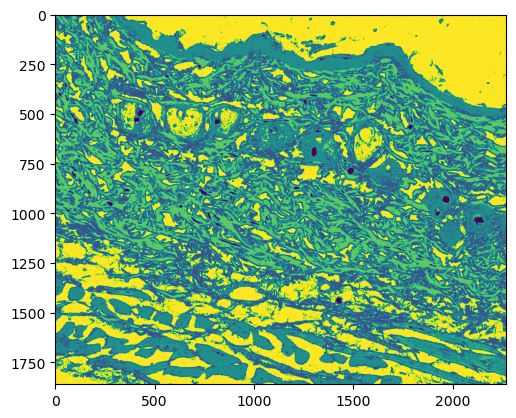

In [47]:
fin_img=p.reshape(MM_B.shape[:2])
plt.imshow(fin_img)
plt.savefig('label.jpg',dpi=1000,bbox_inches='tight')
plt.imshow(label1.reshape(MM_B.shape[:2]))
plt.savefig('R.jpg',dpi=1000,bbox_inches='tight')
plt.imshow(label2.reshape(MM_B.shape[:2]))
plt.savefig('G.jpg',dpi=1000,bbox_inches='tight')
plt.imshow(label3.reshape(MM_B.shape[:2]))
plt.savefig('B.jpg',dpi=1000,bbox_inches='tight')

In [237]:
PBPs=['MMCD lambda1','MMCD lambda2','MMCD lambda3','MMCDlambda4','MMCD_P1','MMCD_P2','MMCD_P3','MMCD_PI','MMCD_PD','MMCD_S','ES','E1','E2','E3','E4','E5','E6',
     'MMPD_D','MMPD_delta','MMPD_R','P_dot_D','P_vec','D_vec','MM_Det','MM_Norm','MM_Trace','Bfs','Bhls','DLsubqL','MMT_t_1213','MMT_t_2131','MMT_t_2434','MMT_t_4243',
      'MMTPD','MMTrq','PLsubDL','PLsubrL','rLsubqL']
PBP_R=['MMCD lambda1','MMCD lambda2','MMCDlambda4','MMCD_P3','MMCD_S','ES','E1','E2','E3','E4', 'MMPD_delta','MM_Trace','Bfs','DLsubqL','MMTPD','MMTrq','PLsubDL','PLsubrL','rLsubqL']
PBP_G=['MMCD lambda1','MMCD lambda2','MMCDlambda4','MMCD_P3','MMCD_S','ES','E1','E2','E3','E4', 'MMPD_delta','MM_Trace','Bfs','DLsubqL','MMTPD','MMTrq','PLsubDL','PLsubrL','rLsubqL']
PBP_B=['MMCD lambda1','MMCD lambda2','MMCDlambda4','MMCD_P3','MMCD_S','ES','E1','E2','E3','E4', 'MMPD_delta','MM_Trace','Bfs','DLsubqL','MMTPD','MMTrq','PLsubDL','PLsubrL','rLsubqL']

In [48]:
pbps_R=loadmat(fc[0]+'/pbps.mat')['pbps'].reshape(MM_B_new.shape[0]*MM_B_new.shape[1],19)
pbps_G=loadmat(fc[1]+'/pbps.mat')['pbps'].reshape(MM_B_new.shape[0]*MM_B_new.shape[1],19)
pbps_B=loadmat(fc[2]+'/pbps.mat')['pbps'].reshape(MM_B_new.shape[0]*MM_B_new.shape[1],19)

In [ ]:
DATA = DataFrame(pbps_B,columns=PBP_B)
plt.subplots(figsize = (30,20))
sns.heatmap(DATA.corr().abs(),annot=True)

In [49]:
groups=[]
groups_R_mean=[]
groups_G_mean=[]
groups_B_mean=[]
for i in range(max(np.unique(p))):
    groups_R_mean.append(pbps_R[p==i].mean(axis=0))
    groups_G_mean.append(pbps_G[p==i].mean(axis=0))
    groups_B_mean.append(pbps_B[p==i].mean(axis=0))
    groups=stack((groups_R_mean,groups_G_mean,groups_B_mean),axis=2)
shape(groups)

(122, 19, 3)

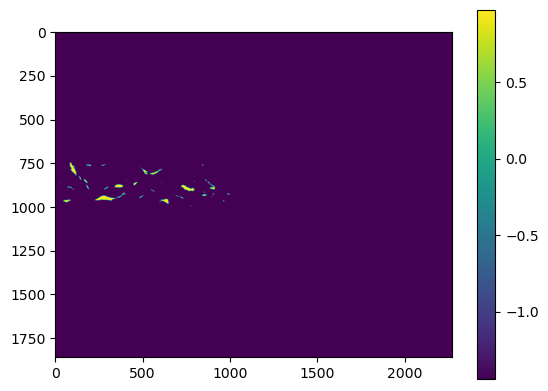

In [445]:
DLsubqL_R=loadmat(fc[0]+'/DLsubqL.mat')['DLsubqL']
DLsubqL_G=loadmat(fc[1]+'/DLsubqL.mat')['DLsubqL']
DLsubqL_B=loadmat(fc[2]+'/DLsubqL.mat')['DLsubqL']
DLsubqL=DLsubqL_R+DLsubqL_G+DLsubqL_B
imshow(DLsubqL)
colorbar()
threshold=DLsubqL<-.5
mask=zeros(shape(DLsubqL))
mask[750:1000,0:1000]=1
roi=threshold*mask
b=3*roi+m11
plt.imshow(roi)

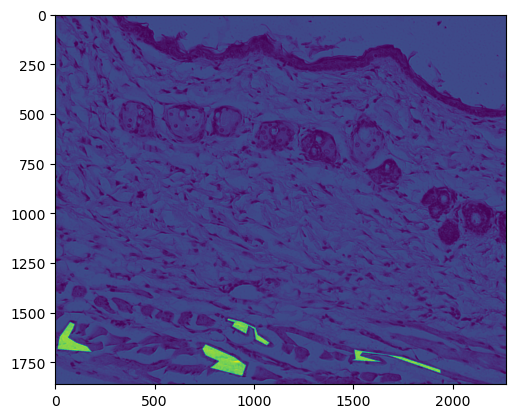

(69,)


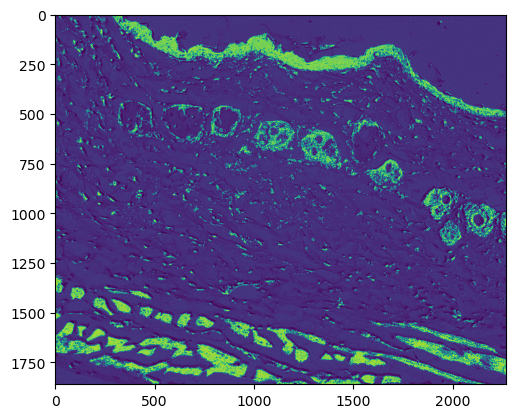

In [56]:
param = ['roi_background.mat','roi_cell_core.mat','roi_collagen.mat','roi_epithelium.mat','roi_muscle.mat','roi_sebaceous_gland.mat','roi_shaft.mat']
m11=loadmat(fc[0]+'/m11.mat')['CalibratedM11']
roi_background=loadmat(param[4])['roi']
interest = m11 + 3*roi_background
plt.imshow(interest)
#plt.savefig('interest.jpg',dpi=1000,bbox_inches='tight')
plt.show()
Mask=roi_background*fin_img
a,indices=np.unique(Mask,return_counts=True)
print(shape(np.unique(a)))
contribute=stack((a,indices),axis=1)
contribute1=contribute[np.lexsort(-contribute.T)]
name=['Pixel','Number']
DATA=DataFrame(contribute1,columns=name)
percent10=contribute1[0:int(0.1 * size(np.unique(a))),0]
percent30=contribute1[0:int(0.3 * size(np.unique(a))),0]
percent50=contribute1[0:int(0.5 * size(np.unique(a))),0]
percent70=contribute1[0:int(0.7 * size(np.unique(a))),0]
percent100=contribute1[:,0]
result=zeros(shape(m11))

for i in percent10:
    result[fin_img==i]=1
interest_result=5*result + m11
plt.imshow(interest_result)
#plt.savefig('100%.jpg',dpi=1000,bbox_inches='tight')

In [866]:
for num in percent50:
    groups[num,:]

array([  0, 120, 150, 749, 420, 755, 140, 128, 152, 124, 424, 428, 450,
       751, 122, 719, 156, 440, 148, 448, 422, 144, 919, 404, 923, 444,
       927, 142, 739, 452, 158, 721, 408, 903, 154, 939, 126, 456, 104,
       108, 943, 947, 442, 170, 907, 949, 458, 727, 725, 723, 775, 454,
       921], dtype=int64)

In [610]:
standard_mask1=standard_mask.reshape(m11.shape[0]*m11.shape[1],1)
result1=result.reshape(m11.shape[0]*m11.shape[1],1)
DATA=stack((standard_mask1,result1),axis=1)
a,indices = np.unique(DATA, return_counts=True, axis=0)
P=indices[3] / (indices[3] + indices[1])
R=indices[3] / (indices[3] + indices[2])
E=indices[1] / (indices[2] + indices[3])
print(P)
print(R)
print(E)

0.6841889717912447
0.6497383752450195
0.29990916663799044


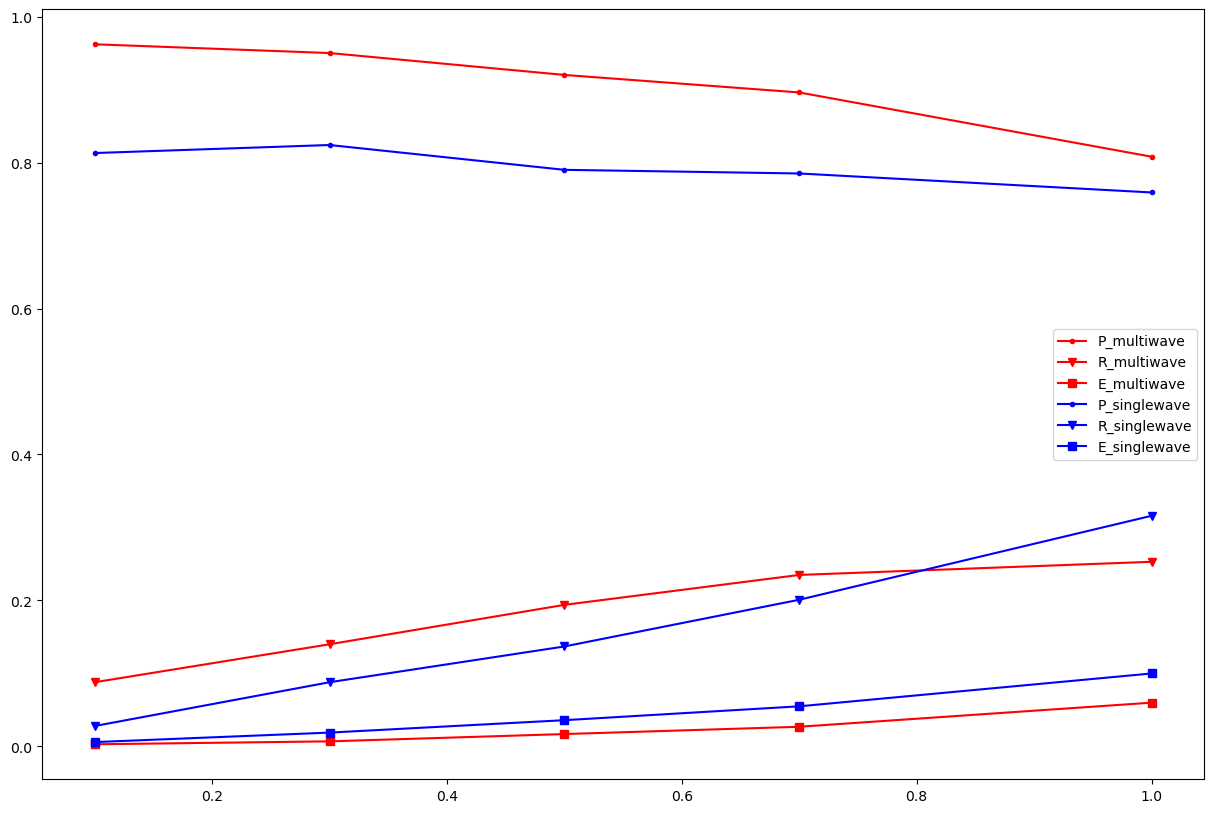

In [458]:
P_3=[0.757,0.684,0.920,0.896,0.808]
R_3=[0.362,0.650,0.194,0.235,0.253]
E_3=[0.116,0.300,0.017,0.027,0.060]

P_1=[0.822,0.802,0.773,0.748,0.684]
R_1=[0.150,0.410,0.595,0.738,0.843]
E_1=[0.033,0.101,0.174,0.249,0.389]
x=[0.1,0.3,0.5,0.7,1]
labels=['P_multiwave','R_multiwave','E_multiwave','P_singlewave','R_singlewave','E_singlewave']
plt.subplots(figsize = (15,10))
plt.plot(x,P_3,marker='.',color='r')
plt.plot(x,R_3,marker='v',color='r')
plt.plot(x,E_3,marker='s',color='r')
plt.plot(x,P_1,marker='.',color='b')
plt.plot(x,R_1,marker='v',color='b')
plt.plot(x,E_1,marker='s',color='b')
legend(labels=labels)